In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve
RANDOM_SEED=6

In [13]:
data=pd.read_csv('training_set_features.csv',index_col='respondent_id')

In [14]:
data.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [51]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier


In [16]:
categorical_cols=data.select_dtypes(include=['object','category']).columns
numerical_cols=data.select_dtypes(include=['int64','float64']).columns

In [19]:
labels_data=pd.read_csv('training_set_labels.csv',index_col='respondent_id')

In [21]:
labels_data.head()

,xyz_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [24]:
data.shape


(26707, 35)

In [25]:
labels_data.shape

(26707, 2)

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt


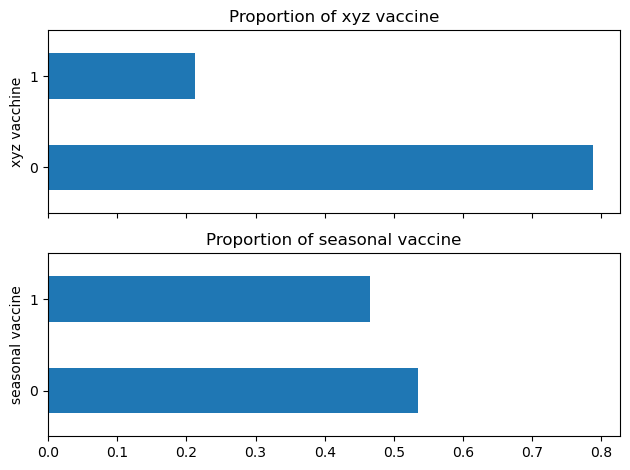

In [33]:
fig, ax=plt.subplots(2,1,sharex=True)
n_obs=labels_data.shape[0]
(labels_data['xyz_vaccine'].value_counts().div(n_obs).plot.barh(title="Proportion of xyz vaccine",ax=ax[0]))
ax[0].set_ylabel("xyz vacchine")
(labels_data['seasonal_vaccine'].value_counts().div(n_obs).plot.barh(title="Proportion of seasonal vaccine",ax=ax[1])) 
ax[1].set_ylabel("seasonal vaccine")
fig.tight_layout()

In [34]:
pd.crosstab(labels_data["xyz_vaccine"],labels_data["seasonal_vaccine"],margins=True,normalize=True)

seasonal_vaccine,0,1,All
xyz_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [36]:
(labels_data["xyz_vaccine"].corr(labels_data["seasonal_vaccine"],method="pearson"))

0.37714265306144507

In [39]:
combined_data=data.join(labels_data)
combined_data.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [40]:
combined_data.shape


(26707, 37)

In [41]:
counts=(combined_data[['xyz_concern','xyz_vaccine']].groupby(['xyz_concern','xyz_vaccine']).size().unstack('xyz_vaccine'))
counts

xyz_vaccine,0,1
xyz_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


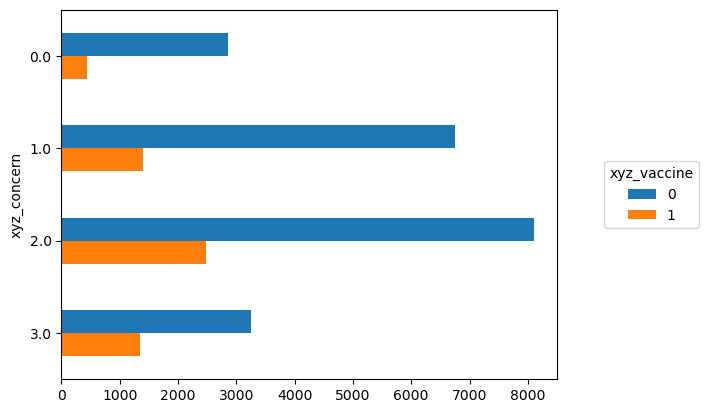

In [44]:
ax=counts.plot.barh()
ax.invert_yaxis()
ax.legend(loc='center right',bbox_to_anchor=(1.3,0.5),title='xyz_vaccine')

In [45]:
xyz_concern_counts=counts.sum(axis="columns")
xyz_concern_counts

xyz_concern
0.0     3296
1.0     8153
2.0    10575
3.0     4591
dtype: int64

In [46]:
props=counts.div(xyz_concern_counts,axis='index')
props

xyz_vaccine,0,1
xyz_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


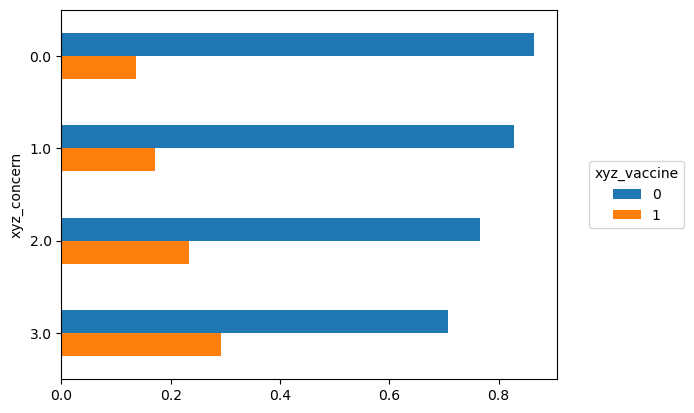

In [48]:
ax=props.plot.barh()
ax.invert_yaxis()
ax.legend(loc='center left',bbox_to_anchor=(1.05,0.5),title='xyz_vaccine')


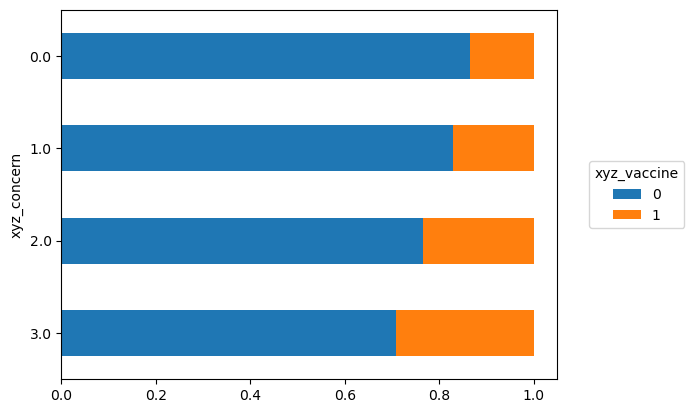

In [49]:
ax=props.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(loc='center left',bbox_to_anchor=(1.05,0.5),title='xyz_vaccine')


In [53]:
numeric_preprocessing_steps=Pipeline([('standard_scaler',StandardScaler()),('simple_imputer',SimpleImputer(strategy='median'))])
preprocessor=ColumnTransformer(transformers=[("numeric",numeric_preprocessing_steps,numerical_cols)],remainder="drop")

In [64]:
estimators=MultiOutputClassifier(estimator=LogisticRegression(penalty="l2",C=1))

In [65]:
full_pipeline=Pipeline([("preprocessor",preprocessor),("estimators",estimators),])
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'be...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object'))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [66]:
X_train,X_eval,y_train,y_eval=train_test_split(data,labels_data,test_size=0.33,shuffle=True,stratify=labels_data,random_state=RANDOM_SEED)

In [67]:
full_pipeline.fit(X_train,y_train)
predictions=full_pipeline.predict_proba(X_eval)
predictions

[array([[0.70898963, 0.29101037],
        [0.9022304 , 0.0977696 ],
        [0.84459811, 0.15540189],
        ...,
        [0.92338263, 0.07661737],
        [0.89632521, 0.10367479],
        [0.92787943, 0.07212057]]),
 array([[0.52721977, 0.47278023],
        [0.61838467, 0.38161533],
        [0.37024394, 0.62975606],
        ...,
        [0.85936904, 0.14063096],
        [0.77843342, 0.22156658],
        [0.15115096, 0.84884904]])]

In [68]:
predictions[0].shape

(8814, 2)

In [69]:
predictions[1].shape

(8814, 2)

In [74]:
y_preds=pd.DataFrame({'xyz_vaccine':predictions[0][: ,1],'seasonal_vaccine':predictions[1][: ,1],},index=y_eval.index)
y_preds.shape

(8814, 2)

In [75]:
y_preds.head()

,xyz_vaccine,seasonal_vaccine
respondent_id,,
6728,0.291010,0.472780
16516,0.097770,0.381615
3106,0.155402,0.629756
16981,0.661791,0.857876
19111,0.284478,0.776927


In [76]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}")

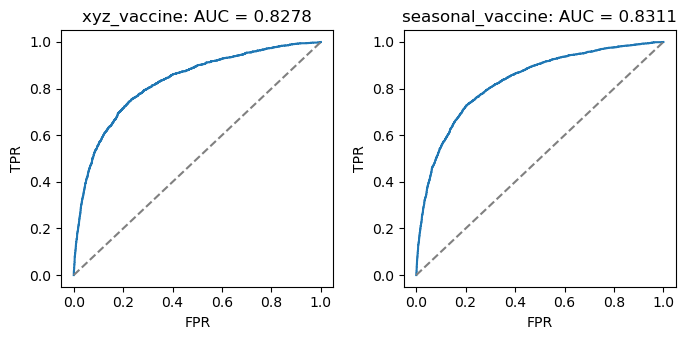

In [77]:
fig, ax=plt.subplots(1,2,figsize=(7,3.5))
plot_roc(y_eval['xyz_vaccine'],y_preds['xyz_vaccine'],'xyz_vaccine',ax=ax[0])
plot_roc(y_eval['seasonal_vaccine'],y_preds['seasonal_vaccine'],'seasonal_vaccine',ax=ax[1])
fig.tight_layout()

In [78]:
roc_auc_score(y_eval,y_preds)

0.8294712007285718

In [79]:
full_pipeline.fit(data,labels_data)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'be...
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object'))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [81]:
test_data=pd.read_csv('test_set_features.csv',index_col='respondent_id')

In [82]:
test_probs=full_pipeline.predict_proba(test_data)
test_probs

[array([[0.87280333, 0.12719667],
        [0.94475602, 0.05524398],
        [0.62906951, 0.37093049],
        ...,
        [0.80411015, 0.19588985],
        [0.9492446 , 0.0507554 ],
        [0.38421362, 0.61578638]]),
 array([[0.57359831, 0.42640169],
        [0.92876678, 0.07123322],
        [0.3626162 , 0.6373838 ],
        ...,
        [0.59872448, 0.40127552],
        [0.68003071, 0.31996929],
        [0.35787941, 0.64212059]])]

In [85]:
submission_data=pd.read_csv('submission_format.csv',index_col='respondent_id')
submission_data.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [87]:
np.testing.assert_array_equal(test_data.index.values,submission_data.index.values)
submission_data["h1n1_vaccine"]=test_probs[0][: ,1]
submission_data['seasonal_vaccine']=test_probs[1][: ,1]

In [88]:
submission_data.head()


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.127197,0.426402
26708,0.055244,0.071233
26709,0.370930,0.637384
26710,0.464351,0.803446
26711,0.286673,0.634903


In [90]:
submission_data.rename(columns={'h1n1_vaccine':'xyz_vaccine'},inplace=True)

In [91]:
submission_data.head()

,xyz_vaccine,seasonal_vaccine
respondent_id,,
26707,0.127197,0.426402
26708,0.055244,0.071233
26709,0.370930,0.637384
26710,0.464351,0.803446
26711,0.286673,0.634903


In [92]:
submission_data.to_csv('my_first_submission.csv',index=True)